In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import json
import re

## Load Airbnb dataset 

In [ ]:
"""
columns = ["ID", "Country", "City", "Picture Url",
            'Name', 'Summary', 'Space', 'Description', 'Neighborhood Overview', 'House Rules',
            'Neighbourhood', 'Price', 'Review Scores Rating']
df = pd.read_csv("../../data/airbnb-data-science/airbnb-listings.csv", usecols=columns, sep=';')
df = df[columns]
df.head(2)

#### Filter listings in NYC and select random 100 listings
#df[df["Country"]=="United States"].groupby("City").count()["Country"].reset_index().sort_values("Country", ascending=False)
#len(df[df["City"]=="New York"])

df_nyc = df[df["City"] == "New York"].copy()
df_nyc.dropna(inplace=True)
df_nyc_filtered = df_nyc.sample(n=100, random_state=1)
df_nyc_filtered.to_csv("../../data/airbnb-data-science/airbnb-listings-random100nyc.csv", index=False)
df_nyc_filtered
"""

In [7]:
df_nyc_filtered = pd.read_csv("../../data/airbnb-data-science/airbnb-listings-random100nyc.csv")
df_nyc_filtered               

,ID,Country,City,Picture Url,Name,Summary,Space,Description,Neighborhood Overview,House Rules,Neighbourhood,Price,Review Scores Rating
0,1984816,United States,New York,https://public.opendatasoft.com/api/v2/catalog...,"Gorgeous Space, Industrial NYC Apt",My gorgeous two-bedroom apartment on the Upper...,Do you have an extra large party? Check if my ...,My gorgeous two-bedroom apartment on the Upper...,THE NEIGHBORHOOD The apartment is located in a...,-Please no smoking inside. -Please take trash ...,Upper East Side,249.0,82.0
1,12363329,United States,New York,https://public.opendatasoft.com/api/v2/catalog...,Near Columbia Univ&The City College,You can use 14 feet x 13 feet clean and quiet ...,I offer you one of my rooms as a private bedro...,You can use 14 feet x 13 feet clean and quiet ...,Close to Columbia University (both main campus...,Please treat the space with respect and be con...,Hamilton Heights,58.0,100.0
2,4823105,United States,New York,https://public.opendatasoft.com/api/v2/catalog...,Cozy Affordable Room Available In NYC!!,Washington heights represents the flavor of di...,Cozy Small room ( 12 L- 9.5 W) it's waiting wh...,Washington heights represents the flavor of di...,The Neighborhood its awesome it is like a melt...,- Absolutely no strangers in the apartment ( n...,Washington Heights,44.0,100.0
3,6452019,United States,New York,https://public.opendatasoft.com/api/v2/catalog...,Loft Studio Midtown Lux Doorman,Newly renovated & fully furnished studio loft ...,Newly renovated contemporary loft studio apart...,Newly renovated & fully furnished studio loft ...,* Located between Murray Hill and Flatiron * C...,Must be respectful and clean Absolutely no pa...,Midtown East,205.0,93.0
4,6661923,United States,New York,https://public.opendatasoft.com/api/v2/catalog...,"Hell´s Kitchen, cozy functional 2br","A perfect, vibey , midtown west location from ...",This is NYC and hopefully you are not here for...,"A perfect, vibey , midtown west location from ...","Hell's Kitchen, 9th ave does not sleep and the...",We do not wear shoes inside the apartment and ...,Hell's Kitchen,150.0,80.0
5,11672400,United States,New York,https://public.opendatasoft.com/api/v2/catalog...,Modern East Village Studio Apt,"Cozy, modern and completely private apartment ...",Amenities Include: * 100mbps Super-Fast WiFi ...,"Cozy, modern and completely private apartment ...",• Michelin Star Restaurants – Momofuku Ko (2 S...,MAIN RULES: -I'd like to know your estimated a...,Gramercy Park,110.0,94.0
6,10850008,United States,New York,https://public.opendatasoft.com/api/v2/catalog...,Bright comfy 1BR steps to Columbia University,Quiet sun-filled 1 bedroom apartment in a safe...,This is a peaceful apartment with all the comf...,Quiet sun-filled 1 bedroom apartment in a safe...,The apartment is located in Morningside Height...,Additional guest fees apply. Minimum stay of ...,Morningside Heights,185.0,100.0
7,8634515,United States,New York,https://public.opendatasoft.com/api/v2/catalog...,"Spacious, Serene Apt in Trendy SoHa","Experience Harlem's vibrant culture, food, his...",The apartment sleeps 2 people comfortably.,"Experience Harlem's vibrant culture, food, his...",SoHa or South Harlem has evolved tremendously ...,I have put a lot of energy and love into makin...,Harlem,171.0,97.0
8,4098302,United States,New York,https://public.opendatasoft.com/api/v2/catalog...,Two Bedroom Right in Times Square!,This Midtown apartment is fully furnished with...,"Located on the 5th floor,no elevator, of an ap...",This Midtown apartment is fully furnished with...,This two bedroom unit is located right in the ...,There are no parties allowed on the premises a...,Hell's Kitchen,271.0,74.0
9,2623348,United States,New York,https://public.opendatasoft.com/api/v2/catalog...,Charming Small Private Bed in 6 Floor Walkup,This is a charming *small* 1 bedroom; we live ...,The great location and general quiet is the be...,This is a charming *small* 1 bedroom; we live ...,It's very cl

## Retrieve images from url

In [9]:
for i in range(len(df_nyc_filtered)):
    image_url = df_nyc_filtered.iloc[i]["Picture Url"]
    listing_id = df_nyc_filtered.iloc[i]["ID"]
    src = "../../data/airbnb-data-science/listing_images_random100nyc/" + str(listing_id) + ".jpg"
    urllib.request.urlretrieve(image_url, src)

## Get aesthetic score for images

In [ ]:
# https://github.com/idealo/image-quality-assessment
# https://towardsdatascience.com/using-docker-to-set-up-a-deep-learning-environment-on-aws-6af37a78c551
# https://ai.googleblog.com/2017/12/introducing-nima-neural-image-assessment.html
# https://developer.nvidia.com/blog/deep-learning-hotel-aesthetics-photos/
# https://medium.com/idealo-tech-blog/using-deep-learning-to-automatically-rank-millions-of-hotel-images-c7e2d2e5cae2

In [10]:
! ../../image-quality-assessment/predict  --docker-image nima-cpu --base-model-name MobileNet --weights-file /Users/nesara/Documents/aim/cs/projects/image-quality-assessment/models/MobileNet/weights_mobilenet_aesthetic_0.07.hdf5 --image-source /Users/nesara/Documents/aim/cs/projects/data/airbnb-data-science/listing_images_random100nyc/ >> image_aesthetic_score.txt

2020-12-07 14:52:39.428226: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-12-07 14:52:39.449184: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2697980000 Hz
2020-12-07 14:52:39.450600: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x361ba90 executing computations on platform Host. Devices:
2020-12-07 14:52:39.451282: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version
2020-12-07 14:52:47.666638: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 205520896 exceeds 10% of system memory.
2020-12-07 14:52:48.242019: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 209207296 exceeds 10% of system memory.
2020-12-07 14:52:53.475824: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 115605504 exceeds 10% of system memory.
2020-12-07 14:52:53.9815

#### Load image aesthetic scores into dataframe

In [35]:
with open('image_aesthetic_score.txt') as f:
    img_scores = json.load(f)
dfis = pd.DataFrame(img_scores)
dfis.columns = ["ID", "Image Score"]
dfis["ID"] = dfis["ID"].astype(int)
dfis["Image Score"] = np.round(dfis["Image Score"], 2)
dfis.head(5)

,ID,Image Score
0,10017359,5.03
1,10036516,3.70
2,10167860,5.08
3,10755415,5.11
4,10850008,5.25


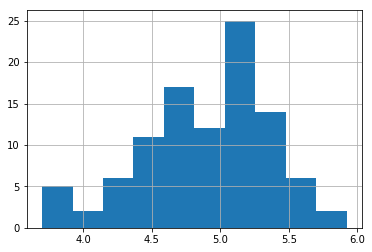

In [31]:
dfis["Image Score"].hist()

In [38]:
dfdb = df_nyc_filtered.set_index("ID").join(dfis.set_index("ID")).reset_index()
db_columns = ["ID", "City", "Name", "Neighbourhood", "Price", "Review Scores Rating", "Image Score"]
dfdb = dfdb[db_columns]
dfdb.rename(columns={"Review Scores Rating":"Rating", "Image Score":"Score"}, inplace=True)
dfdb

,ID,City,Name,Neighbourhood,Price,Rating,Score
0,1984816,New York,"Gorgeous Space, Industrial NYC Apt",Upper East Side,249.0,82.0,5.16
1,12363329,New York,Near Columbia Univ&The City College,Hamilton Heights,58.0,100.0,4.79
2,4823105,New York,Cozy Affordable Room Available In NYC!!,Washington Heights,44.0,100.0,4.34
3,6452019,New York,Loft Studio Midtown Lux Doorman,Midtown East,205.0,93.0,5.46
4,6661923,New York,"Hell´s Kitchen, cozy functional 2br",Hell's Kitchen,150.0,80.0,5.04
5,11672400,New York,Modern East Village Studio Apt,Gramercy Park,110.0,94.0,5.62
6,10850008,New York,Bright comfy 1BR steps to Columbia University,Morningside Heights,185.0,100.0,5.25
7,8634515,New York,"Spacious, Serene Apt in Trendy SoHa",Harlem,171.0,97.0,4.44
8,4098302,New York,Two Bedroom Right in Times Square!,Hell's Kitchen,271.0,74.0,4.82
9,2623348,New York,Charming Small Private Bed in 6 Floor Walkup,Upper East Side,90.0,92.0,5.47


### Insert data into DB

In [66]:
rows_data = ''
for i in range(len(dfdb)):
    row = dfdb.iloc[i].copy()
    # Remove special characters
    row["Name"] = re.sub(r"[^a-zA-Z0-9 ]+", '', row["Name"])
    row["Neighbourhood"] = re.sub(r"[^a-zA-Z0-9 ]+", '', row["Neighbourhood"])

    if i == (len(dfdb)-1):
        rows_data += "('" + str(row["ID"]) + "','" + row["City"] + "','" + row["Name"] + "','" + row["Neighbourhood"] + "','" + str(row["Price"]) + "','" + str(row["Rating"]) +  "','" + str(row["Score"]) + "');"
    else:
        rows_data += "('" + str(row["ID"]) + "','" + row["City"] + "','" + row["Name"] + "','" + row["Neighbourhood"] + "','" + str(row["Price"]) + "','" + str(row["Rating"]) +  "','" + str(row["Score"]) + "'),\n"
    
    """
    if i == (len(dfdb)-1):
        rows_data += "('" + str(row["ID"]) + "','" + row["City"] + "','" + row["Name"] + "','" + row["Neighbourhood"] + "','" + str(row["Price"]) + "','" + str(row["Rating"]) + "');"
    else:
        rows_data += "('" + str(row["ID"]) + "','" + row["City"] + "','" + row["Name"] + "','" + row["Neighbourhood"] + "','" + str(row["Price"]) + "','" + str(row["Rating"]) + "'),\n"
    """


In [68]:
sql_drop_text = "DROP TABLE IF EXISTS listings;\n"

sql_create_text = "" + \
"CREATE TABLE listings (\n"+\
"id INTEGER PRIMARY KEY AUTOINCREMENT,\n" + \
"listingid INTEGER NOT NULL,\n" + \
"city TEXT NOT NULL,\n" + \
"name TEXT NOT NULL,\n" + \
"neighbourhood TEXT NOT NULL,\n" + \
"price INTEGER NOT NULL,\n" + \
"rating INTEGER NOT NULL,\n" + \
"score FLOAT NOT NULL\n" + \
");\n"

"""
sql_insert_text = "INSERT INTO product(category, image_path)\n"+ \
"VALUES\n"+ \
"('bed', '168.jpg')\n"+ \
"('chair', '086.jpg')"
"""

sql_insert_text = "INSERT INTO listings(listingid, city, name, neighbourhood, price, rating, score)\n"+ \
"VALUES\n"+ rows_data


text = sql_drop_text + sql_create_text + sql_insert_text

with open('schema.sql', 'w') as writer:
    writer.write(text)